In [1]:
from scipy.stats.mstats import winsorize
from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

import math
import sys
import os

In [17]:
genotyping_path = "../../data/genotyping/"

In order to run grace we can use the same covariate and phenotype file obtained in the individual view step: `1-gwas_datscan.ipynb`

In [35]:
covariate_fn = os.path.join(genotyping_path, "Individual_View_Datscan/covariate_datscan.txt")
covariate    = pd.read_csv(covariate_fn, sep=" ")
covariate

FID\tIID\tPC1\tPC2\tPC3\tPC4\tPC5\tPC6\tPC7\tPC8\tPC9\tPC10\tAge\tGENDER\tEDUCYRS
0    3000\t3000\t0.023275900000000002\t0.00138768\t...                               
1    3001\t3001\t0.0154554\t0.015081\t-0.00360313\t...                               
2    3002\t3002\t-0.0819525\t-0.0363301\t-0.0218476...                               
3    3004\t3004\t0.023785900000000002\t0.0323961000...                               
4    3006\t3006\t0.0040832\t0.0595587\t0.101779\t-0...                               
..                                                 ...                               
417  4124\t4124\t0.00714437\t0.0336145\t0.0375074\t...                               
418  4125\t4125\t-0.0246021\t0.0252135\t-0.02460290...                               
419  4126\t4126\t-0.00928714\t0.00373578\t-0.034894...                               
420  4136\t4136\t0.0356073\t-0.015905600000000002\t...                               
421  4139\t4139\t0.0506079\t-0.10256099999999999\t-...                               

[422 rows x 1 columns]

In [36]:
pheno_fn  = os.path.join(genotyping_path, "Individual_View_Datscan/phenotype_datscan.txt")
phenotype = pd.read_csv(pheno_fn, sep=" ")
phenotype

FID   IID  ENROLL_CAT  CAUDATE_R  CAUDATE_L  PUTAMEN_R  PUTAMEN_L
0    3000  3000           1   0.932467   1.368655   1.786562   1.448689
1    3001  3001           2  -0.313764  -0.507784  -0.313764  -0.648172
2    3002  3002           2   0.835925   1.656152   0.032656   0.696547
3    3004  3004           1   2.971827   2.971827   2.383049   1.882275
4    3006  3006           2   0.038596  -0.188099  -0.408846  -2.499599
..    ...   ...         ...        ...        ...        ...        ...
417  4124  4124           2  -0.376783  -0.993825  -0.802708  -0.531566
418  4125  4125           2  -0.276558   0.282731  -0.194144   0.507784
419  4126  4126           2  -0.937061  -0.590633  -0.746610  -1.622036
420  4136  4136           2  -2.383049  -2.383049  -2.021570  -2.216709
421  4139  4139           1   0.230577   0.655513   0.909784   0.587103

[422 rows x 7 columns]

# Run GRACE

In [ ]:
!Rscript run_grace_datscan.R

In [34]:
grace_path = os.path.join(genotyping_path, "Integrated_View_Datscan")

In [37]:
fields = ['id','gamma0']
grace_result = pd.read_csv(os.path.join(grace_path, "CAUDATE_R_grace.csv"), usecols=fields)
grace_result 

id     gamma0
0    3000 -24.013652
1    3001   2.574564
2    3002 -16.277526
3    3004 -20.617340
4    3006  12.453408
..    ...        ...
417  4124  -0.394135
418  4125  -3.840286
419  4126  18.762960
420  4136  30.275217
421  4139 -27.648771

[422 rows x 2 columns]

In [38]:
phenotype = phenotype.iloc[:,0:3]
phenotype.head(5)

FID   IID  ENROLL_CAT
0  3000  3000           1
1  3001  3001           2
2  3002  3002           2
3  3004  3004           1
4  3006  3006           2

In [20]:
phenotype = phenotype.merge(grace_result, left_on=["FID"], right_on=["id"]).drop(["id"], axis=1)
phenotype

FID   IID  ENROLL_CAT     gamma0
0    3000  3000           1 -24.013652
1    3001  3001           2   2.574564
2    3002  3002           2 -16.277526
3    3004  3004           1 -20.617340
4    3006  3006           2  12.453408
..    ...   ...         ...        ...
417  4124  4124           2  -0.394135
418  4125  4125           2  -3.840286
419  4126  4126           2  18.762960
420  4136  4136           2  30.275217
421  4139  4139           1 -27.648771

[422 rows x 4 columns]

In [21]:
phenotype.to_csv(
    os.path.join(grace_path, "Phenotype.txt"),
    header=True,
    index=False,
    sep=" "
)

In [25]:
ppmi_eu_final_fn = os.path.join(genotyping_path, "PPMI_eu_noswedd_ds")
pheno_fn         = os.path.join(grace_path, "Phenotype.txt")
cov_fn           = os.path.join(genotyping_path, "Individual_View_Datscan/covariate_datscan.txt")
res_fn           = os.path.join(grace_path, "Grace_DATScan")

In [26]:
!plink --bfile {ppmi_eu_final_fn} --pheno {pheno_fn} --covar {cov_fn} --pheno-name gamma0 --covar-name Age,PC1-PC5,EDUCYRS --allow-no-sex --linear hide-covar sex --adjust --out {res_fn} 

PLINK v1.90b6.12 64-bit (28 Oct 2019)          www.cog-genomics.org/plink/1.9/
(C) 2005-2019 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to ../../data/genotyping/Integrated_View_Datscan/Grace_DATScan.log.
Options in effect:
  --adjust
  --allow-no-sex
  --bfile ../../data/genotyping/PPMI_eu_noswedd_ds
  --covar ../../data/genotyping/Individual_View_Datscan/covariate_datscan.txt
  --covar-name Age,PC1-PC5,EDUCYRS
  --linear hide-covar sex
  --out ../../data/genotyping/Integrated_View_Datscan/Grace_DATScan
  --pheno ../../data/genotyping/Integrated_View_Datscan/Phenotype.txt
  --pheno-name gamma0

32768 MB RAM detected; reserving 16384 MB for main workspace.
129241 variants loaded from .bim file.
422 people (286 males, 136 females) loaded from .fam.
422 phenotype values present after --pheno.
Using 1 thread (no multithreaded calculations invoked).
--covar: 7 out of 13 covariates loaded.
Before main variant filters, 422 founders and 0 nonfounders present.
Calc

In [ ]:
!Rscript plot_datscan_Grace.R

In [31]:
results_fn = "../../results/integratedView/DaTSCAN"

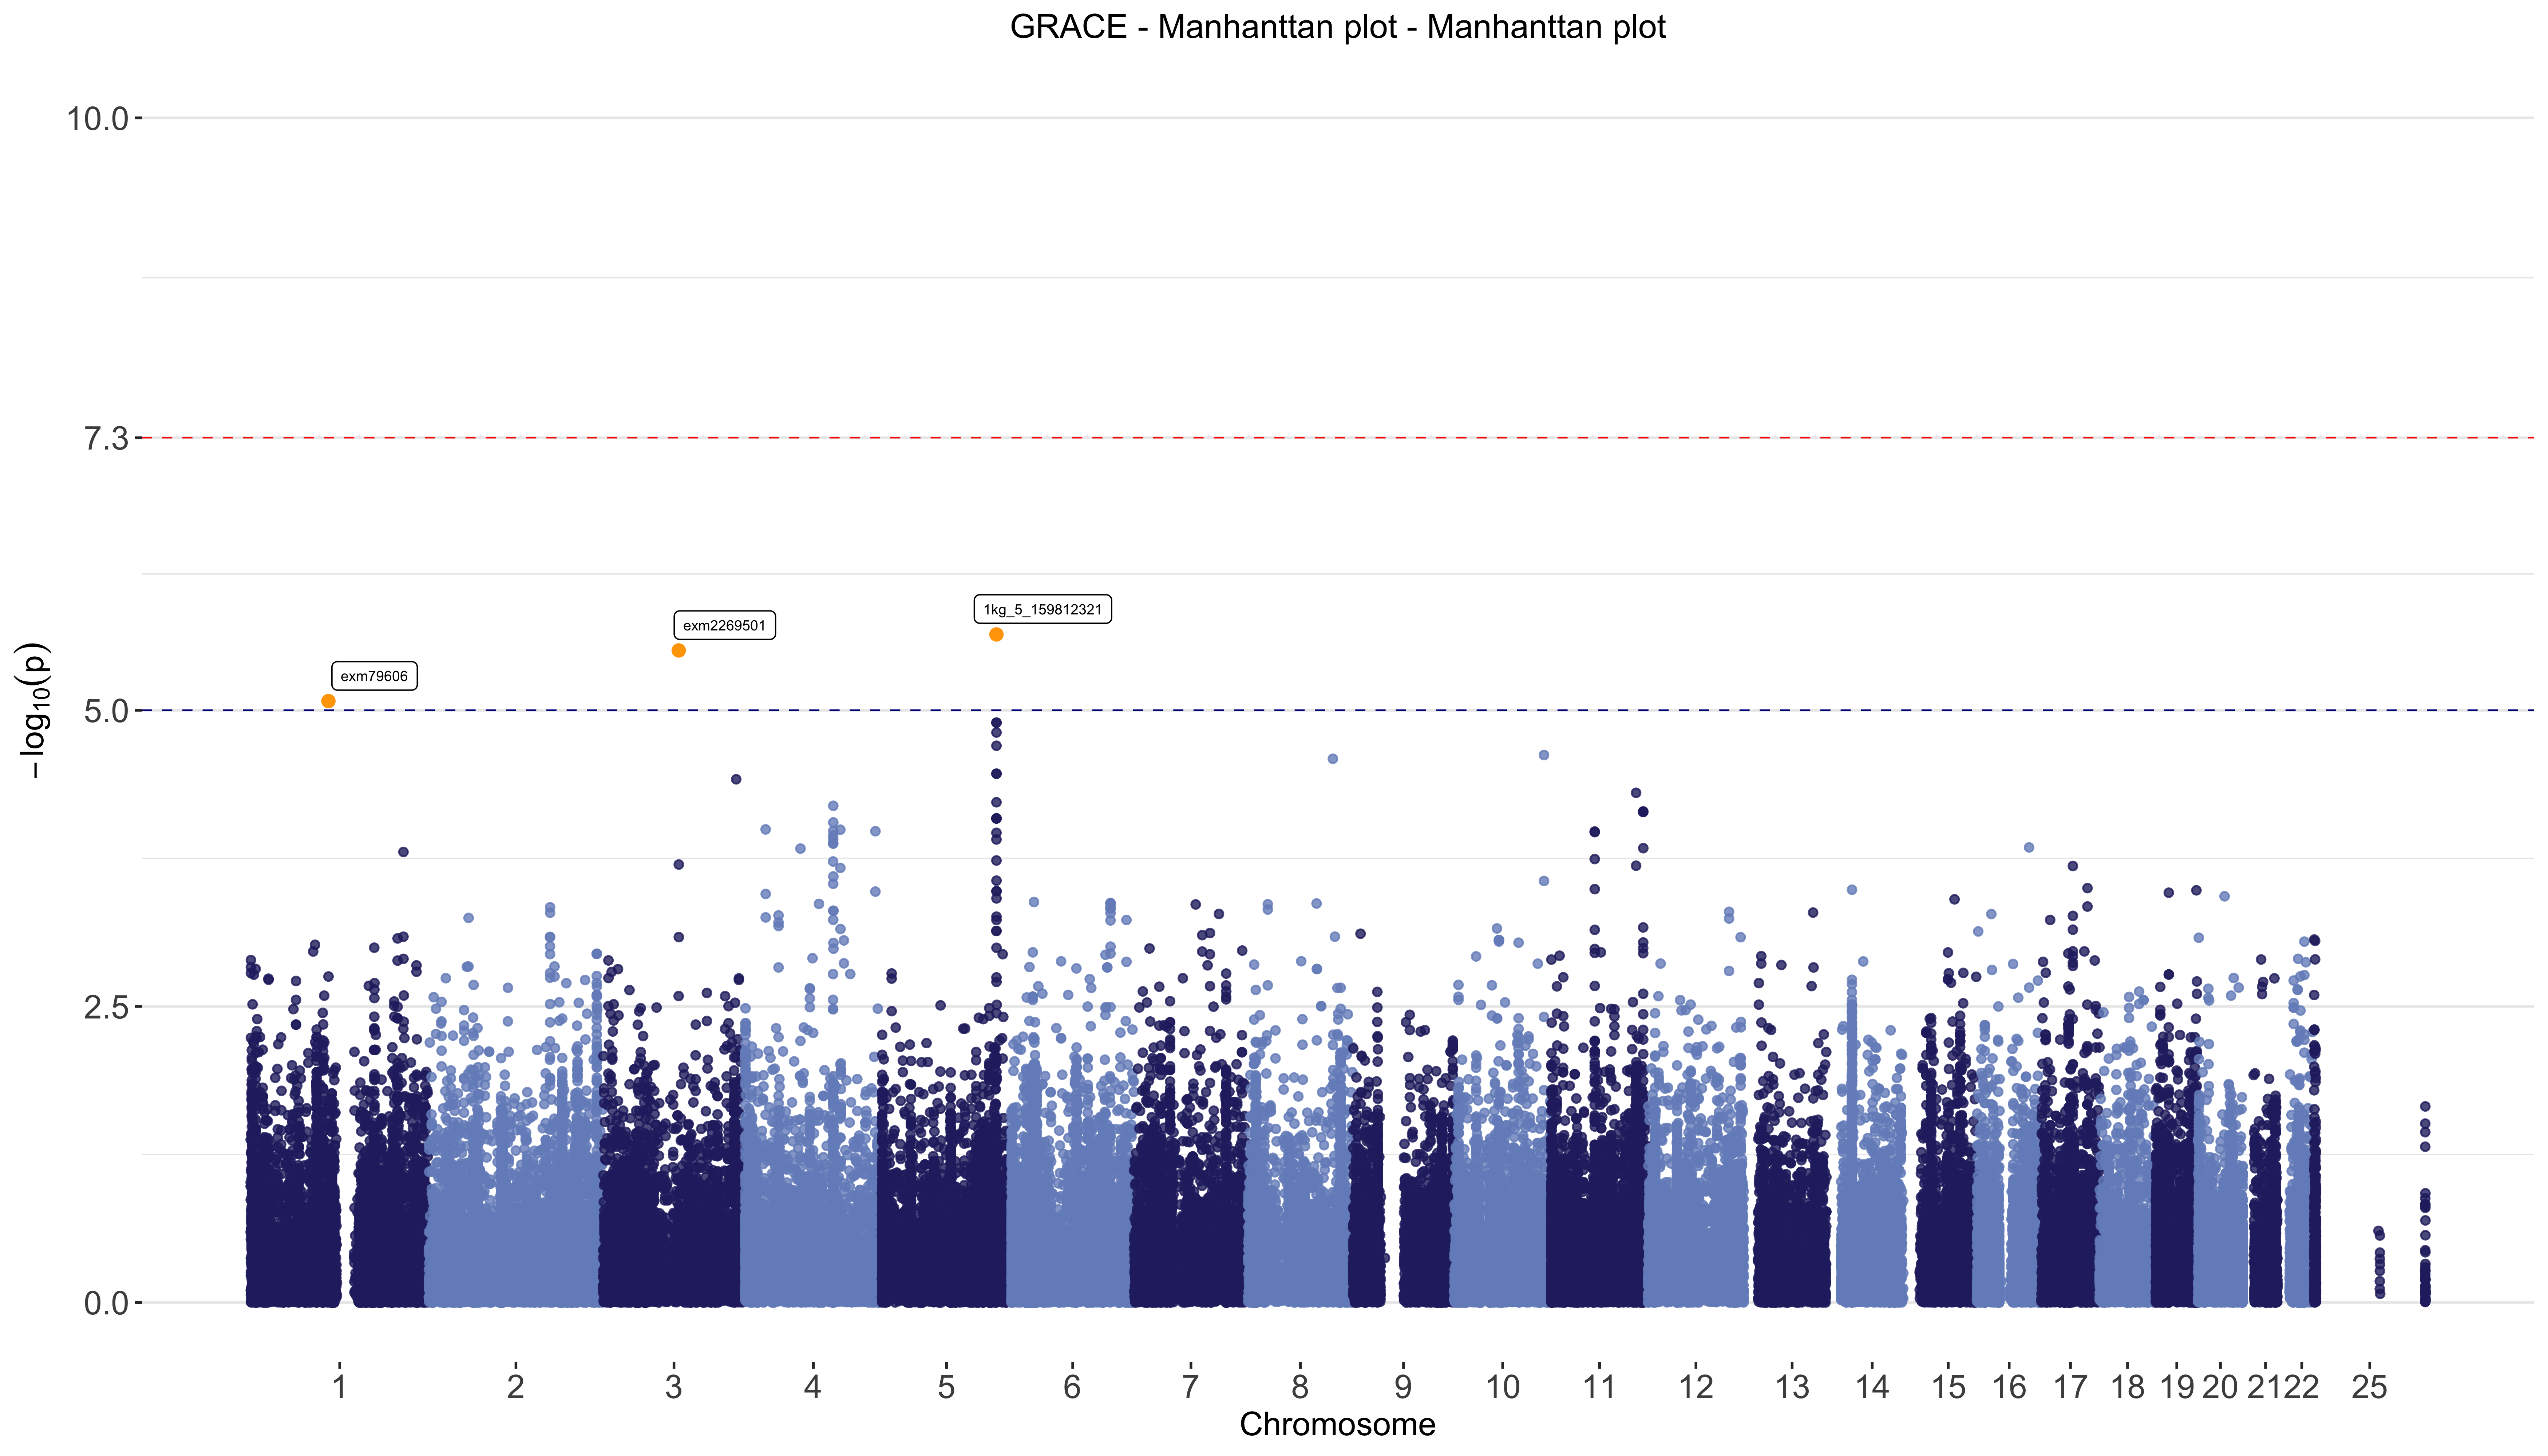

In [32]:
Image.open(os.path.join(results_fn, "Manhattan_datscan_Grace.png"))

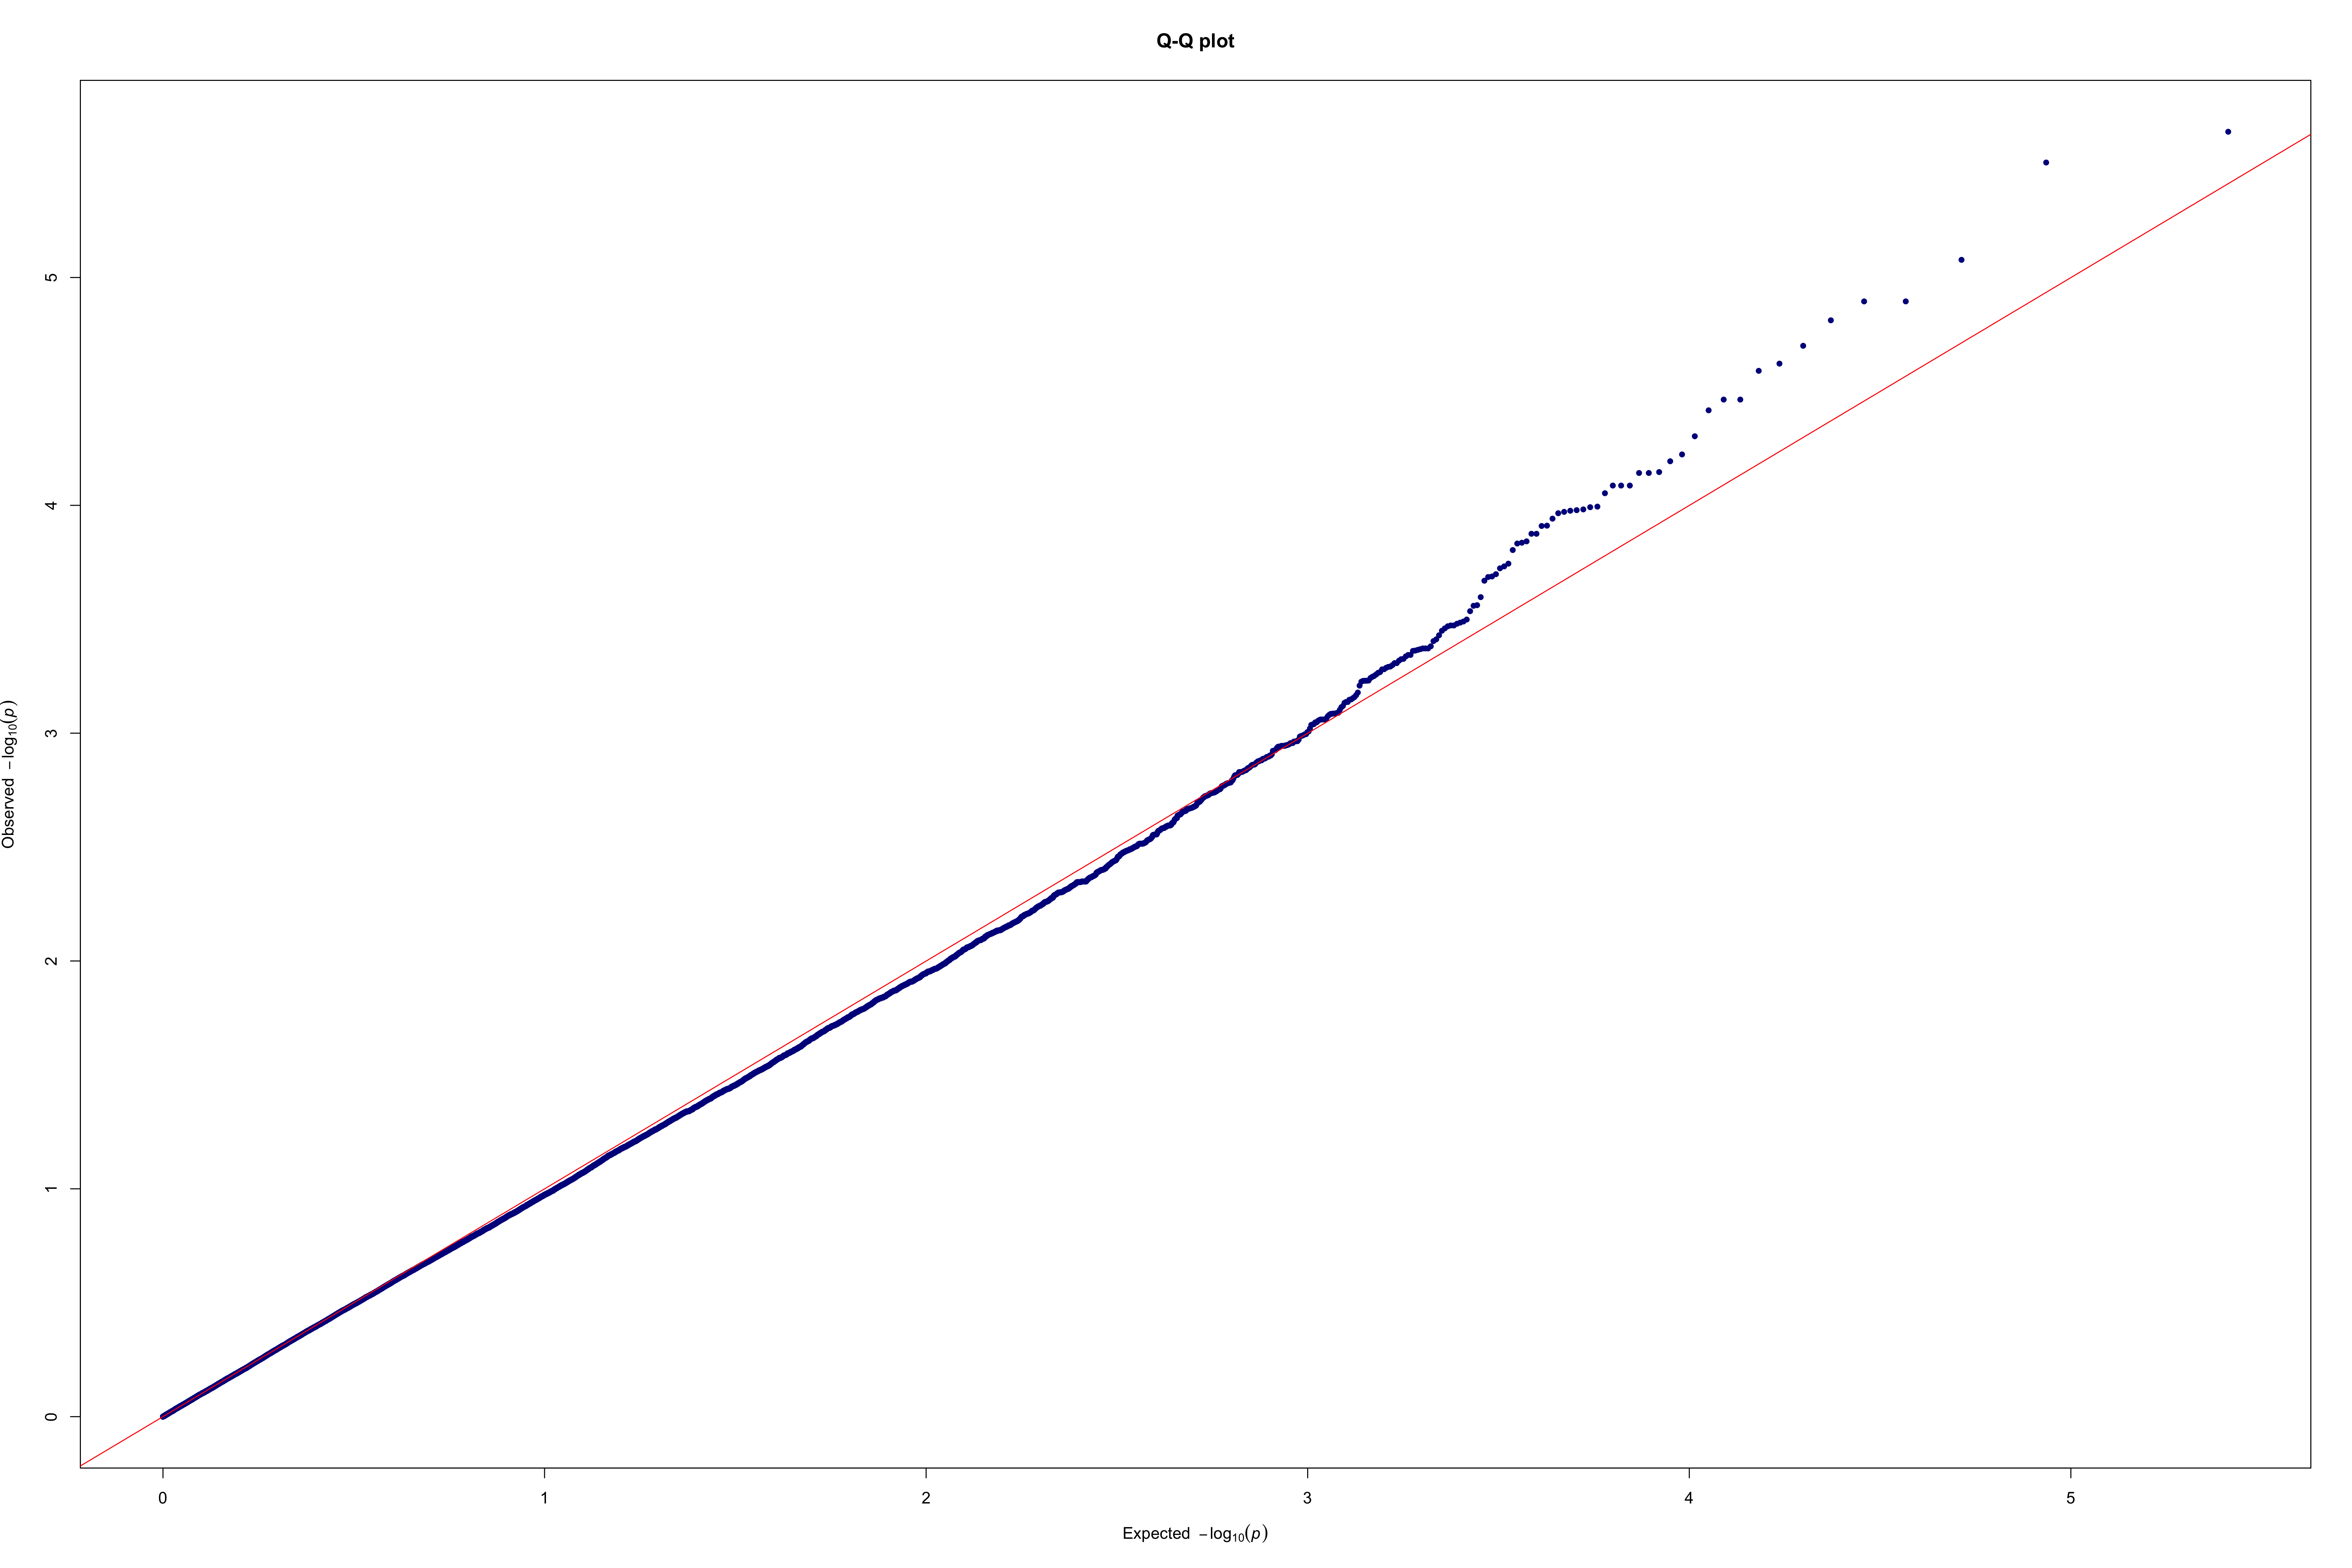

In [33]:
Image.open(os.path.join(results_fn, "QQ_datscan_Grace.png"))